In [128]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

#_________Rules_______________:
#R1   Q=cA
def rule1(dA,c):
    return c*dA
#R2   Q=cA^m
def rule2(A,dA,m,c):
    return c*m*(A**(m-1))*dA
#R3   Q=A+B or A-B
def rule3(dA,dB):
    dQ = np.sqrt(dA**2 + dB**2)
    return dQ
#R4   Q=cA^mB^n
def rule4(Q,A,dA,m,B,dB,n):
    s = ((m*dA/A)**2)+((n*dB/B)**2)
    return Q*np.sqrt(s)
#R4+  Q=cA^mB^nC^o
def rule4plus(Q,A,dA,m,B,dB,n,C,dC,o):
    s = ((m*dA/A)**2)+((n*dB/B)**2)+((o*dC/C)**2)
    return Q*np.sqrt(s)

In [129]:

#goodness of fit parameter
def LLSFD2(x,y,dy,b,m):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D


def plotfit(x,y,dy,title,xlabel,ylabel,slopeunit,color1,color2,mark,style):
    
    b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy);fit = b+m*x; N = LLSFD2(x,y,dy,b,m);D=Delta(x, dy)
    dm = np.sqrt(1/D*sum(1/dy**2)); db = np.sqrt(1/D*sum(x**2/dy**2)) #errors in slope and intercept
    plt.scatter(x, y, color=color1, marker=mark)
    #Plot least squares fit line
    plt.plot(x, fit, color=color2, linestyle=style)

    #Plot y error bars - do not need to modify
    plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none")

    #Write x and y axes labels, title.  Modify these!
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title) #Labels
    print("Slope = ",m," ",slopeunit); print("Error in slope = ",dm," ",slopeunit); print("Goodness of fit = ", N)
    
        

$ B_{E,hor} = \frac{B_c,hor}{tan\theta_def } $


$ B_{E,hor} = \frac{ \mu_0 I N }{2r tan\theta_def } $

Slope =  -0.031400958614610834   A/degree
Error in slope =  8.734934292143138e-05   A/degree
Goodness of fit =  133.19483257350993
Slope =  -0.01601406836603072   A/degree
Error in slope =  8.734934292143138e-05   A/degree
Goodness of fit =  92.93110189064586


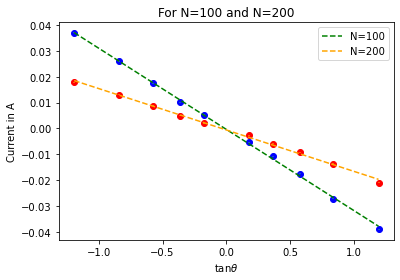

In [130]:
##########Data

#measured/accepted
#Earths horrizontal component according to NCEI
Bh_accepted= 18423.5*(10**-9) #e-9(nano tesla)

#function for calculating Bh
mu=4*np.pi*(10**-7)
def bh(m,N):
    return m*(mu*N/(2*r))

#Measurements and uncertainties
diam= 21.7 #cm
ddiam= .5*.01 #cm

r=diam*.5*.01
dr=rule1(ddiam,.5)

#N--100
I1 = np.array([37.0,25.9,17.44,10.22,5.27,-5.28,-10.66,-17.4,-27.1,-39.0])*.001#mA
theta=np.array([-50,-40,-30,-20,-10,10,20,30,40,50])

thetaR= np.deg2rad(theta)
tan1=np.tan(thetaR)

errI = np.ones(len(I1))*.0002
plotfit(tan1,I1,errI,'For N=100','tan$\\theta$','Current in A','A/degree','blue','green','o','--')



#For N = 200
I2 = np.array([17.8,13.12,8.86,4.97,2.04,-2.70,-5.95,-9.21,-13.66,-21.0])*.001
theta2 = np.array([-50,-40,-30,-20,-10,10,20,30,40,50])
thetaR2= np.deg2rad(theta2)
tan2=np.tan(thetaR2)
errI2 = np.ones(len(I1))*.0002
plotfit(tan2,I2,errI2,'For N=100 and N=200','tan$\\theta$','Current in A','A/degree','red','orange','o','--')
plt.legend(['N=100','N=200'])
plt.savefig('GraphMagField')
plt.show()

In [131]:
#Experimental values of Bh for N=100
m1=-0.0314
Bh1=bh(m1,100)
print(Bh1)
m2=-0.016
Bh2=bh(m2,200)
print(Bh2)

print(Bh_accepted)


-1.8183596188519724e-05
-1.8531053440529656e-05
1.84235e-05


In [132]:
#errors

eBh1=rule4(Bh1,-0.0314,8.7349e-5,1,r,dr,-1)
eBh2=rule4(Bh2,-0.0160,8.7349e-5,1,r,dr,-1)

print(eBh1,eBh2)

-4.2201931132466265e-07 -4.3880409492033313e-07
